In [1]:
import numpy as np
import pandas as pd
import sys
import os

## Tabla Productos por cada Planta

Esta tabla enumera todas las combinaciones de productos y almacén admitidas.

In [2]:
productos_por_planta = pd.read_excel("data.xlsx", sheet_name = "ProductsPerPlant")

productos_por_planta.columns = ["Planta", "Producto"]

In [3]:
productos_por_planta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Planta    2036 non-null   object
 1   Producto  2036 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.9+ KB


*¿La tabla contiene filas duplicadas?*

In [4]:
productos_por_planta.duplicated().any()

False

In [5]:
values = np.arange(1, 16, 1)

productos_por_planta["Planta"] = productos_por_planta["Planta"].replace({"[^\d.]": ""}, regex = True).astype(int)
productos_por_planta = productos_por_planta.loc[productos_por_planta["Planta"].isin(values), :]

productos_por_planta

,Planta,Producto
0,15,1698815
33,5,1650942
34,5,1650946
35,5,1656871
36,5,1656873
...,...,...
2031,4,1699951
2032,4,1699952
2033,4,1699953
2034,4,1699954


*Estadística descriptiva de Recuento de Productos*

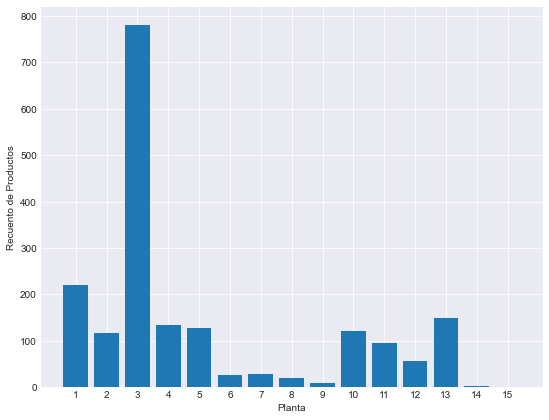

In [6]:
productos_agrup_por_planta = productos_por_planta.groupby(by = "Planta").agg({"Planta": "size"}).rename(columns = {"Planta": "Recuento de Productos"})

sys.path.append(os.path.abspath(".."))

from functions import plot_bar

plot_bar("Planta", "Recuento de Productos", productos_agrup_por_planta.index, productos_agrup_por_planta["Recuento de Productos"])